<a href="https://colab.research.google.com/github/leeesoraaa/TIL/blob/main/data%20analysis/colab/07_seaborn_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 효과적인 분석을 위한 시각화 seaborn

In [ ]:
import seaborn as sns

- 파이썬 기반 시각화 도구는 matplotlib, plotly(플로틀리), ggplot(지지플롯)-R...
- seaborn 시각화 라이브러리는 Matplotlib 시각화 라이브러리의 종속 객체이다.
- Matplotlib의 고사양 그래픽을 지원하는 라이브러리: seaborn

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


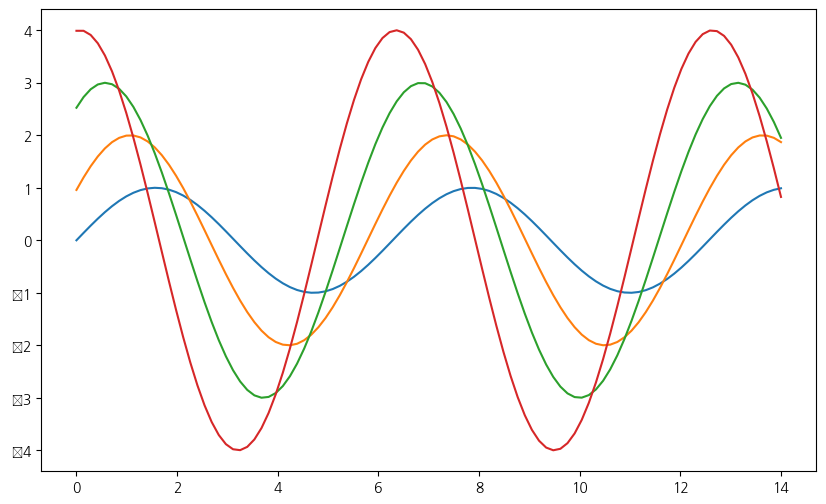

In [ ]:
# 간단하게 몇 개의 사인함수를 시각화해보자

x= np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

# 도화지(캔버스의 크기)
plt.figure(figsize=(10,6))

# plot(x, y, style)
## style = '색선마', 'r->'(빨간선 삼각형마크)
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

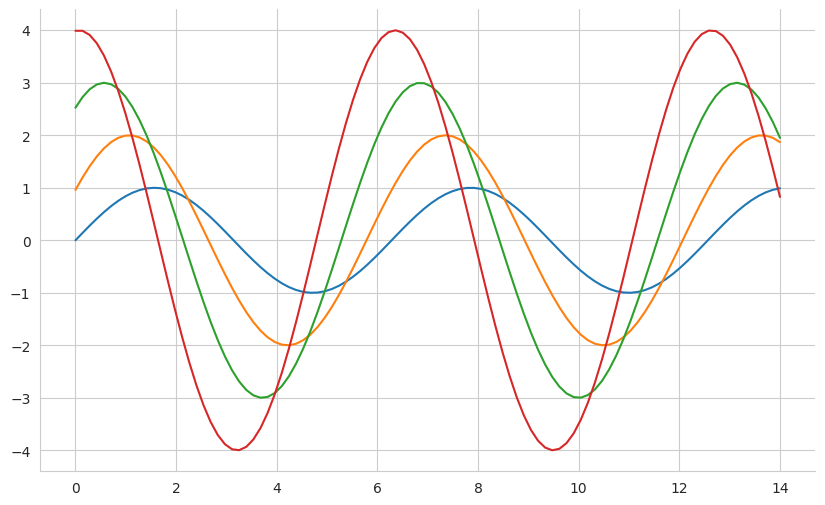

In [ ]:
# seaborn의 whitegrid라는 스타일 지원
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)

# despine: defalt - 위와 오른쪽 선을 제거
sns.despine()

plt.show()

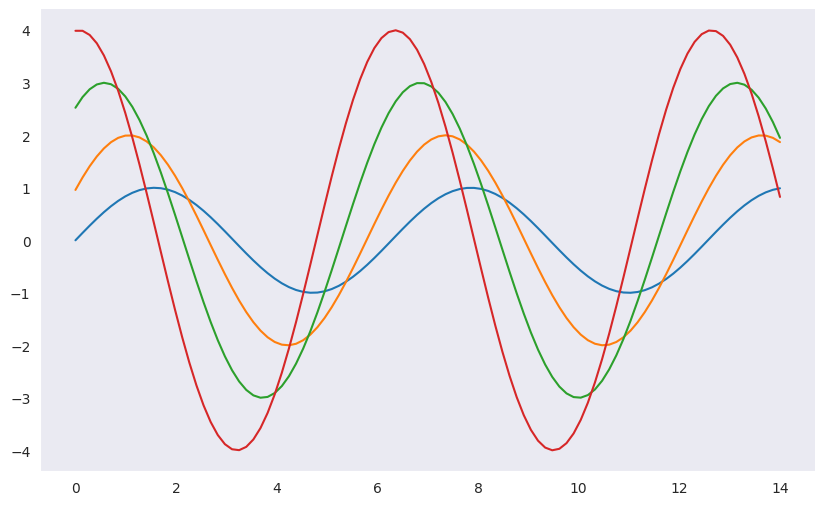

In [ ]:
sns.set_style("dark")

plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)

# despine: 테두리 선을 제거
sns.despine()

plt.show()

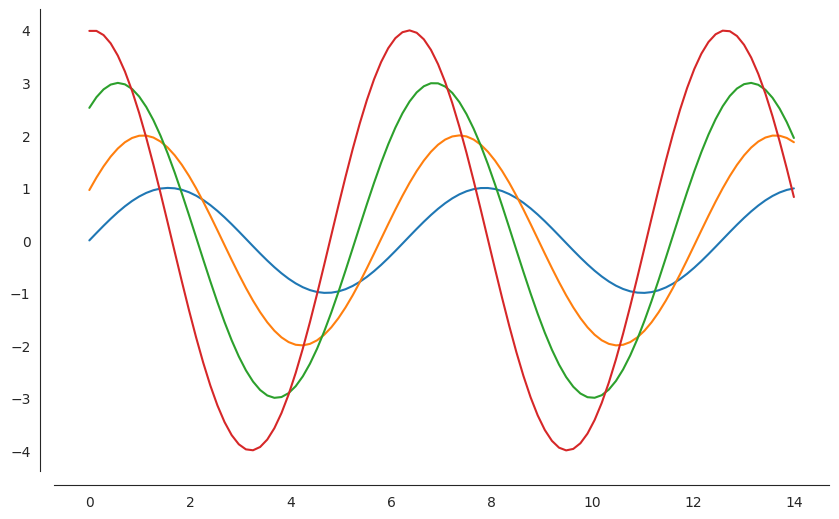

In [ ]:
sns.set_style("white")

plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)

# despine: 테두리 선을 제거
sns.despine(offset = 10)

plt.show()

- Tips라는 데이터셋은 요일별 점심, 저녁, 흡연 여부와 식사 금액과 팁을 정리한 데이터셋

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Tips 데이터셋의 총 결제 금액(total_bill)의 분포
- boxplot: IQR(Inter Quantile Range) = Q3 - Q1
- 이상치 확인

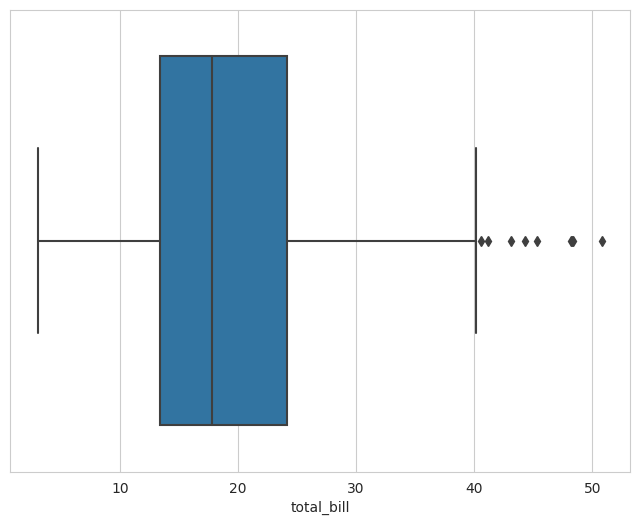

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(x=tips['total_bill'])
plt.show()

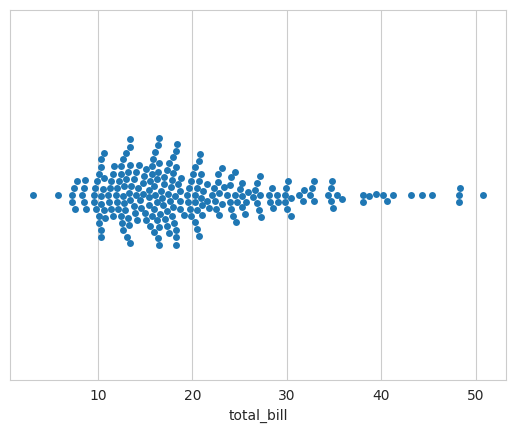

In [ ]:
sns.swarmplot(data=tips, x = 'total_bill')
plt.show()

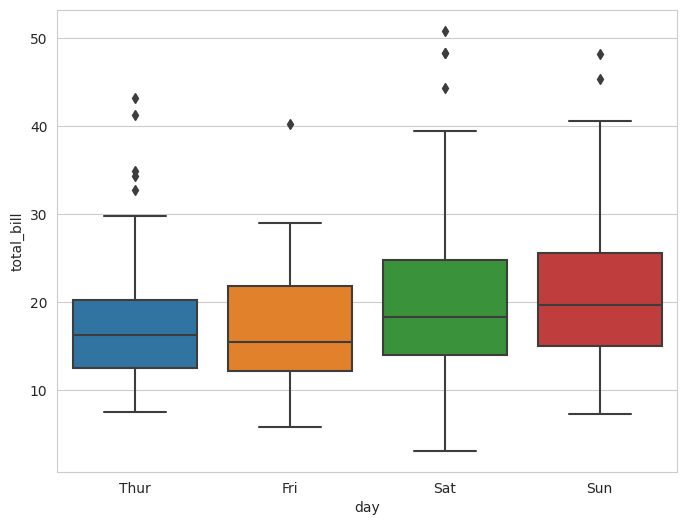

In [ ]:
# boxplot: x축(요일), y축(전체 금액)
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data = tips)
plt.show()

- 주말에 총 결제 금액이 대체로 더 높다.

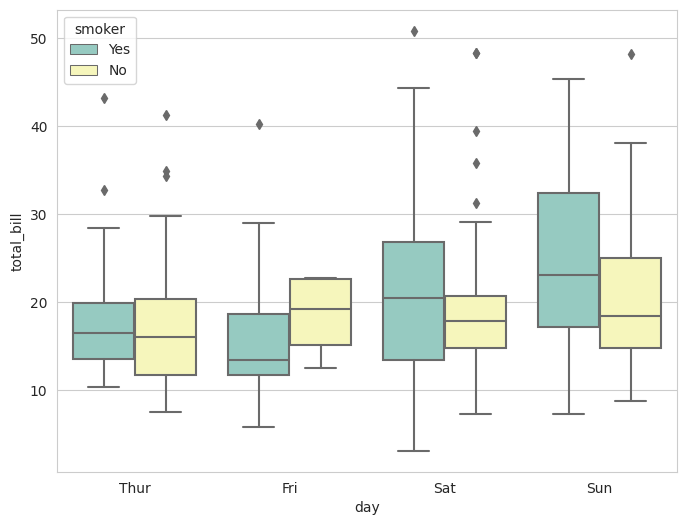

In [ ]:
# hue 옵션으로 구분
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', hue = 'smoker', data = tips, palette='Set3')
plt.show()

- 흡연자의 총 결제 금액이 상대적으로 더 높다.

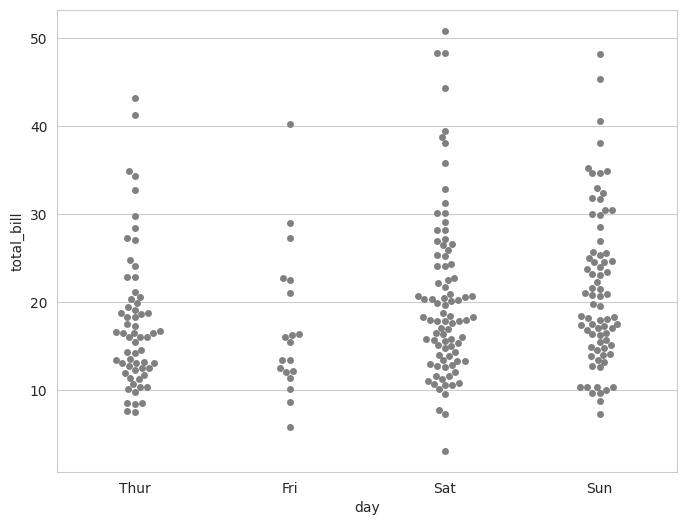

In [ ]:
# swarmplot: 점으로 나타내기
plt.figure(figsize=(8,6))
sns.swarmplot(x='day', y='total_bill', data = tips, color='.5')
plt.show()

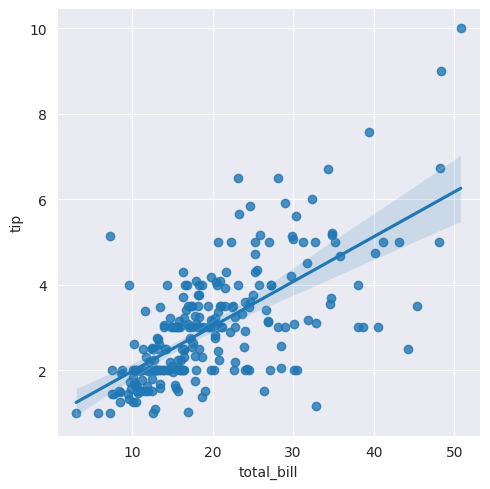

In [ ]:
# lmplot - 회귀선에 유용
## 데이터를 scatter 처럼 그리고, 직선으로 regression을 그리고 유효범위도 ci(신뢰구간)으로 잡음
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

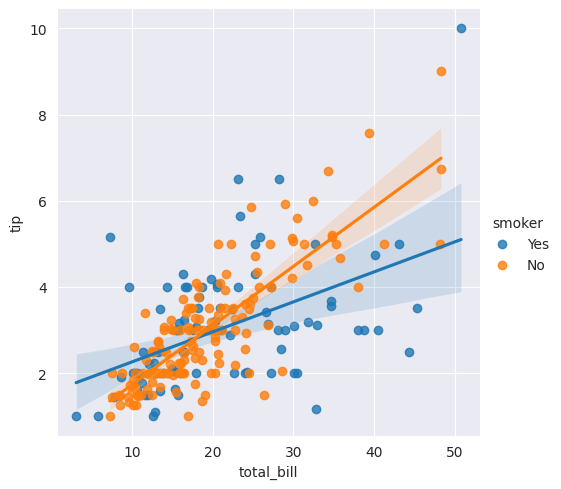

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.show()

# 연도 및 월별 항공기 승객 수를 기록한 데이터셋
- http://seaborn.pydata.org
- tips, flights, iris, titanic,...
- load_dataset('data')

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# 연도 및 월별 항공기 승객 수
# pivot_table을 이용하여 월별, 연도별로 구분이 가능
# pivot(행, 열, 데이터)
flights = flights.pivot('month', 'year', 'passengers')
flights.head()

<ipython-input-82-da9c97fcb0f6>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot('month', 'year', 'passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


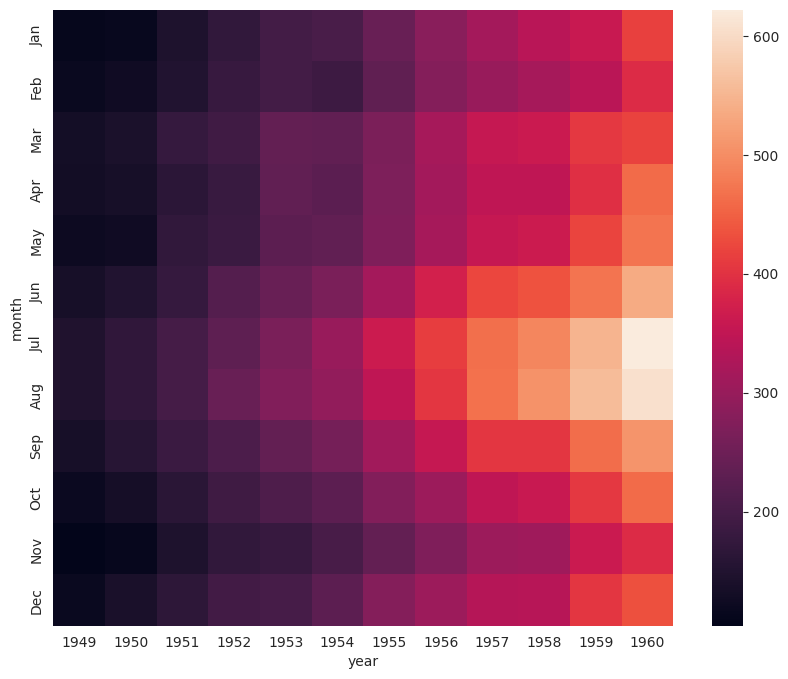

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(flights)
plt.show()

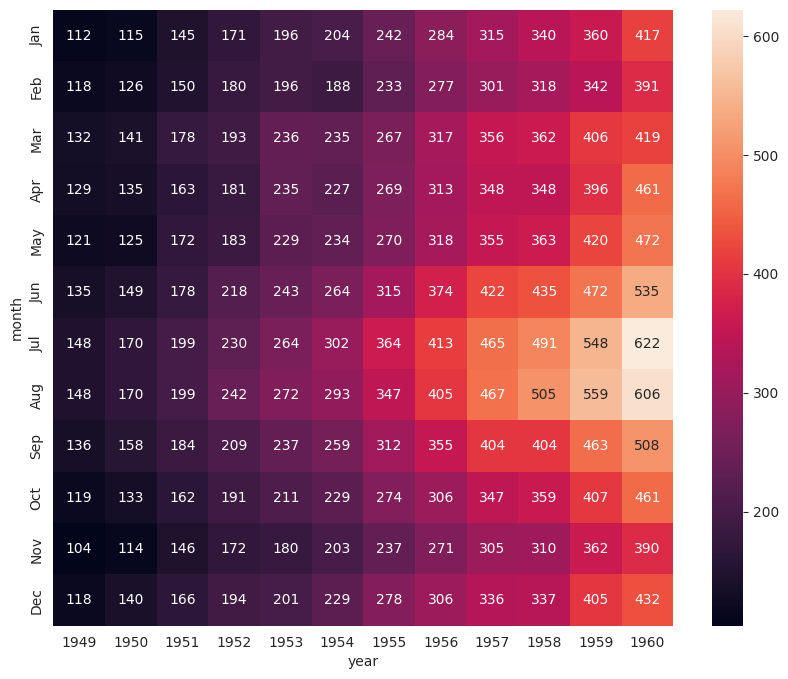

In [ ]:
plt.figure(figsize = (10, 8))

# annot = True: 셀에 값을 담기
# fmt = 'd': digit 정수 담기
sns.heatmap(flights, annot=True, fmt='d')
plt.show()

- 아이리스라는 붓꽃 데이터
- 꽃잎과 꽃받침의 너비와 폭을 가지고 품종을 구분하는 대표적인 머신러닝 데이터셋

In [ ]:
sns.set(style='ticks')
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


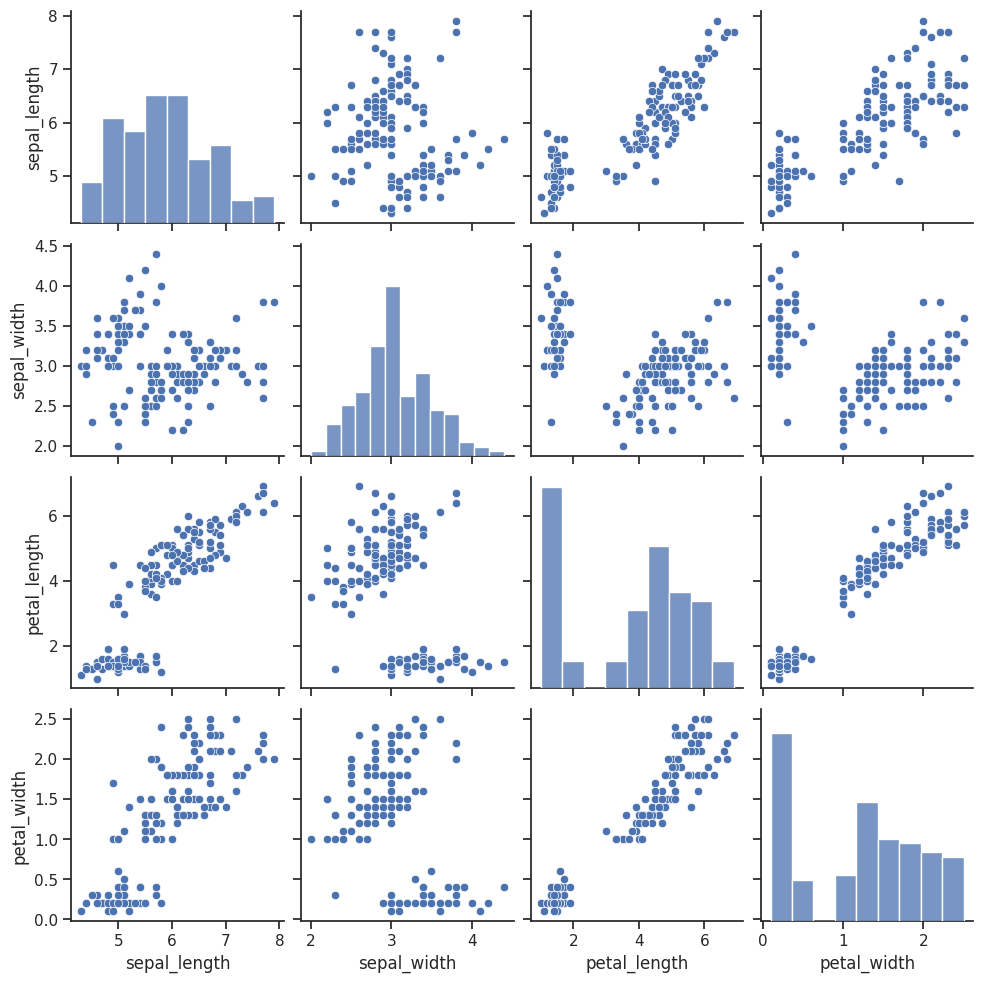

In [ ]:
sns.pairplot(iris)
plt.show()

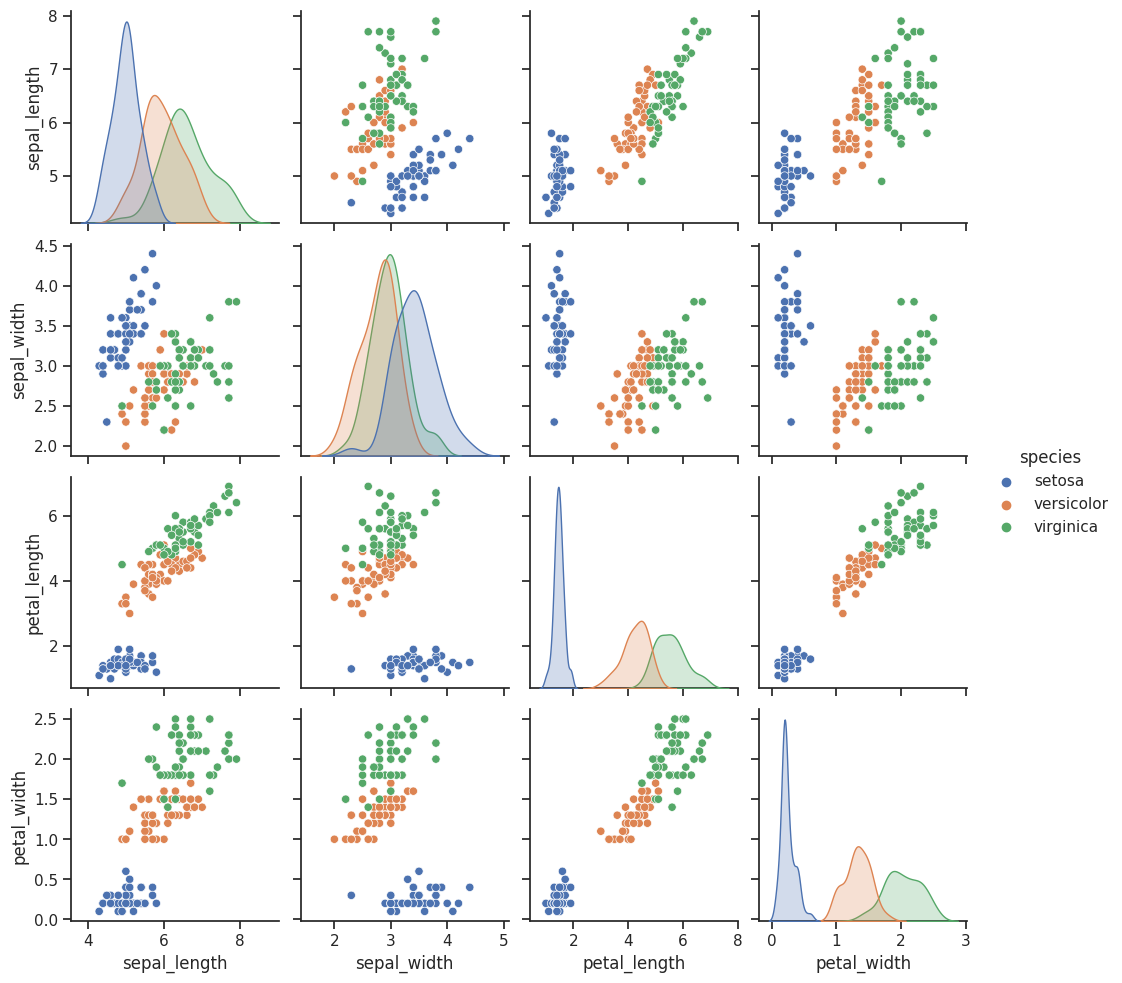

In [ ]:
sns.pairplot(iris, hue='species')
plt.show()